<a href="https://colab.research.google.com/github/ADRIANVM117/data-science-portfolio/blob/main/NBA_PREDICTIVE_MODELING/NBA_PREDICTED_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo para obtener la probabilidad de que un equipo gane 🥇

| Columna            | Descripción                                                                 |
|---------------------|-----------------------------------------------------------------------------|
| `SEASON_ID`        | Identificador de la temporada (por ejemplo, '2023' para la temporada 2023-2024). |
| `TEAM_ID`          | Identificador único del equipo en la base de datos de la NBA.               |
| `TEAM_ABBREVIATION`| Abreviación oficial del equipo (por ejemplo, 'CHI' para Chicago Bulls).     |
| `TEAM_NAME`        | Nombre completo del equipo (por ejemplo, 'Chicago Bulls').                 |
| `GAME_ID`          | Identificador único del juego en la base de datos de la NBA.               |
| `GAME_DATE`        | Fecha en la que se jugó el partido, en formato `YYYY-MM-DD`.               |
| `MATCHUP`          | Indica el enfrentamiento y si el equipo jugó como local ('vs.') o visitante ('@'). |
| `WL`               | Resultado del partido para el equipo (ganado: 'W', perdido: 'L').          |
| `MIN`              | Minutos totales jugados por el equipo en el partido.                       |
| `PTS`              | Puntos anotados por el equipo en el partido.                               |
| `FGM`              | Total de tiros de campo anotados.                                          |
| `FGA`              | Total de tiros de campo intentados.                                        |
| `FG_PCT`           | Porcentaje de tiros de campo anotados (`FGM / FGA`).                       |
| `FG3M`             | Total de tiros de tres puntos anotados.                                    |
| `FG3A`             | Total de tiros de tres puntos intentados.                                  |
| `FG3_PCT`          | Porcentaje de tiros de tres puntos anotados (`FG3M / FG3A`).               |
| `FTM`              | Total de tiros libres anotados.                                            |
| `FTA`              | Total de tiros libres intentados.                                          |
| `FT_PCT`           | Porcentaje de tiros libres anotados (`FTM / FTA`).                         |
| `OREB`             | Total de rebotes ofensivos.                                                |
| `DREB`             | Total de rebotes defensivos.                                               |
| `REB`              | Total de rebotes (`OREB + DREB`).                                          |
| `AST`              | Total de asistencias.                                                     |
| `STL`              | Total de robos de balón.                                                  |
| `BLK`              | Total de bloqueos.                                                        |
| `TOV`              | Total de pérdidas de balón.                                               |
| `PF`               | Total de faltas personales cometidas.                                      |
| `PLUS_MINUS`       | Diferencia en el marcador cuando el equipo estuvo en el campo.             |


!pip install nba_api

from nba_api.stats.endpoints import leaguegamefinder
from nba_api.stats.static import teams
import pandas as pd

# Variable global para almacenar el DataFrame de los partidos del equipo
df_equipo = None

def obtener_partidos_equipo():
    global df_equipo  # Permite modificar la variable global dentro de la función

    # Pedir al usuario la abreviación del equipo
    abreviacion_equipo = input("Ingrese la abreviación del equipo (por ejemplo, 'CHI' para Chicago): ").upper()

    # Buscar el equipo en la lista de equipos
    equipo = [team for team in teams.get_teams() if team['abbreviation'] == abreviacion_equipo]

    # Verificar si se encontró el equipo
    if not equipo:
        print(f"No se encontró un equipo con la abreviación '{abreviacion_equipo}'.")
        return

    # Obtener el ID del equipo
    equipo_id = equipo[0]['id']

    # Obtener los juegos del equipo en la temporada actual
    gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=equipo_id)
    df_equipo = gamefinder.get_data_frames()[0]  # Guardar el DataFrame en la variable global

    # Mostrar los últimos 5 partidos del equipo
    print(df_equipo.head())

# Llamar a la función para cargar los datos y guardarlos en df_equipo
obtener_partidos_equipo()

# df_equipo está ahora disponible para usar en el resto del código

# SI QUIERES TODOS LOS EQUIPOS

In [ ]:
!pip install nba_api

from nba_api.stats.endpoints import leaguegamefinder
from nba_api.stats.static import teams
import pandas as pd

# Variable global para almacenar el DataFrame de los partidos de todos los equipos
df_todos_equipos = None

def obtener_partidos_todos_los_equipos():
    global df_todos_equipos  # Permite modificar la variable global dentro de la función

    # Obtener todos los equipos de la NBA
    lista_equipos = teams.get_teams()

    # Inicializar una lista para almacenar los DataFrames de todos los equipos
    partidos_todos_equipos = []

    # Iterar sobre todos los equipos para obtener sus partidos
    for equipo in lista_equipos:
        equipo_id = equipo['id']
        equipo_abreviacion = equipo['abbreviation']

        # Obtener los juegos de cada equipo en la temporada actual
        gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=equipo_id)
        df_equipo = gamefinder.get_data_frames()[0]  # Guardar el DataFrame para cada equipo

        # Añadir una columna para la abreviación del equipo
        df_equipo['TEAM_ABBREVIATION'] = equipo_abreviacion

        # Añadir los datos del equipo a la lista
        partidos_todos_equipos.append(df_equipo)

    # Concatenar todos los DataFrames en uno solo
    df_todos_equipos = pd.concat(partidos_todos_equipos, ignore_index=True)

    # Mostrar las primeras filas del DataFrame combinado
    print(df_todos_equipos.head())

# Llamar a la función para cargar los datos de todos los equipos y guardarlos en df_todos_equipos
obtener_partidos_todos_los_equipos()

# df_todos_equipos ahora contiene los partidos de todos los equipos


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 279.4/279.4 kB 3.4 MB/s eta 0:00:00
  SEASON_ID     TEAM_ID TEAM_ABBREVIATION      TEAM_NAME     GAME_ID  \
0     22024  1610612737               ATL  Atlanta Hawks  0022400315   
1     22024  1610612737               ATL  Atlanta Hawks  0022400300   
2     22024  1610612737               ATL  Atlanta Hawks  0022400041   
3     22024  1610612737               ATL  Atlanta Hawks  0022400287   
4     22024  1610612737               ATL  Atlanta Hawks  0022400280   

    GAME_DATE      MATCHUP WL  MIN  PTS  ...  FT_PCT  OREB  DREB   REB  AST  \
0  2024-12-02  ATL vs. NOP  W  241  124  ...   0.800  11.0  40.0  51.0   30   
1  2024-11-30    ATL @ CHA  W  240  107  ...   0.778  14.0  35.0  49.0   27   
2  2024-11-29  ATL vs. CLE  W  241  117  ...   0.833  10.0  43.0  53.0   33   
3  2024-11-27    ATL @ CLE  W  240  135  ...   0.920  14.0  37.0  51.0   39   
4  2024-11-25  ATL vs. DAL  L  240  119  ...   0.875   9.0  30.0  39.0   32   

    STL  BLK

# <b> Encontrar valores Nulos  </b>

In [ ]:
import pandas as pd

def revisar_datos(df):
    """
    Revisa un DataFrame en busca de valores NaN, espacios vacíos, '--' y '.'.
    Muestra un resumen de problemas y devuelve una lista de columnas con problemas.

    Args:
        df (pd.DataFrame): El DataFrame a revisar.

    Returns:
        list: Una lista de columnas con problemas detectados.
    """
    problemas = {}

    # Iteramos sobre cada columna del DataFrame
    for columna in df.columns:
        # Condiciones para identificar y contar valores problemáticos
        n_nan = df[columna].isna().sum()
        n_espacios = (df[columna].astype(str).str.strip() == '').sum()
        n_guiones = (df[columna] == '--').sum()
        n_puntos = (df[columna] == '.').sum()

        # Verificamos si hay problemas en la columna actual
        if n_nan > 0 or n_espacios > 0 or n_guiones > 0 or n_puntos > 0:
            problemas[columna] = {
                'NaN': n_nan,
                'Espacios vacíos': n_espacios,
                '--': n_guiones,
                '.': n_puntos
            }

    # Mostrar los problemas encontrados en el DataFrame
    if problemas:
        print("Problemas encontrados en el DataFrame:")
        for columna, detalles in problemas.items():
            print(f"\nColumna '{columna}':")
            for tipo, cantidad in detalles.items():
                if cantidad > 0:
                    print(f" - Contiene {cantidad} valores de tipo '{tipo}'")
    else:
        print("No se encontraron problemas en el DataFrame.")

    # Devolver una lista de columnas problemáticas
    return list(problemas.keys())


In [ ]:
# Llamar a la función para revisar el DataFrame
columnas_problema = revisar_datos(df_todos_equipos)

# Imprimir las columnas problemáticas si las hay
if columnas_problema:
    print("\nDataFrame con columnas problemáticas:")
    print(df_todos_equipos[columnas_problema])
else:
    print("\nNo hay columnas problemáticas para mostrar.")


Problemas encontrados en el DataFrame:

Columna 'WL':
 - Contiene 16 valores de tipo 'NaN'
 - Contiene 13 valores de tipo 'Espacios vacíos'

Columna 'FG_PCT':
 - Contiene 8 valores de tipo 'NaN'

Columna 'FG3A':
 - Contiene 2 valores de tipo 'NaN'

Columna 'FG3_PCT':
 - Contiene 1047 valores de tipo 'NaN'

Columna 'FT_PCT':
 - Contiene 17 valores de tipo 'NaN'

Columna 'OREB':
 - Contiene 4 valores de tipo 'NaN'

Columna 'DREB':
 - Contiene 4 valores de tipo 'NaN'

Columna 'REB':
 - Contiene 1 valores de tipo 'NaN'

Columna 'STL':
 - Contiene 2 valores de tipo 'NaN'

Columna 'PLUS_MINUS':
 - Contiene 29704 valores de tipo 'NaN'

DataFrame con columnas problemáticas:
       WL  FG_PCT  FG3A  FG3_PCT  FT_PCT  OREB  DREB   REB   STL  PLUS_MINUS
0       W   0.510  38.0    0.263   0.800  11.0  40.0  51.0  12.0        12.0
1       W   0.487  33.0    0.303   0.778  14.0  35.0  49.0   8.0         3.0
2       W   0.518  34.0    0.412   0.833  10.0  43.0  53.0   9.0        16.0
3       W   0.474

# <b> Preprocesamiento de datos </b>

In [ ]:
import pandas as pd

def limpiar_dataframe(df):
    """
    Limpia un DataFrame según las reglas definidas:
    - La columna 'WL' rellena los valores NaN con el valor más frecuente ('W' o 'L').
    - Las columnas numéricas rellenan los valores NaN con la media, excepto 'PLUS_MINUS'.
    - La columna 'PLUS_MINUS' no se modifica, pero se informa de los valores NaN encontrados.

    Args:
    df (pd.DataFrame): El DataFrame a limpiar.

    Returns:
    pd.DataFrame: El DataFrame limpio.
    """
    df_limpio = df.copy()

    # Manejar valores NaN en la columna 'WL'
    if 'WL' in df_limpio.columns:
        valor_mas_frecuente = df_limpio['WL'].mode()[0]
        df_limpio['WL'] = df_limpio['WL'].fillna(valor_mas_frecuente)
        print(f"Columna 'WL': Se reemplazaron los NaN con '{valor_mas_frecuente}'.")

    # Manejar columnas numéricas
    columnas_numericas = df_limpio.select_dtypes(include=['number']).columns
    for columna in columnas_numericas:
        if columna != 'PLUS_MINUS':  # Excluir la columna 'PLUS_MINUS'
            media_columna = df_limpio[columna].mean()
            df_limpio[columna] = df_limpio[columna].fillna(media_columna)
            print(f"Columna '{columna}': Se reemplazaron los NaN con la media ({media_columna:.2f}).")

    # Manejar la columna 'PLUS_MINUS'
    if 'PLUS_MINUS' in df_limpio.columns:
        nan_count = df_limpio['PLUS_MINUS'].isna().sum()
        print(f"Columna 'PLUS_MINUS': Contiene {nan_count} valores NaN. No se han modificado.")

    return df_limpio

# Ejemplo de uso
# Asume que tienes un DataFrame llamado df con las columnas mencionadas
df_limpio = limpiar_dataframe(df_todos_equipos)


Columna 'WL': Se reemplazaron los NaN con 'W'.
Columna 'TEAM_ID': Se reemplazaron los NaN con la media (1610612751.35).
Columna 'MIN': Se reemplazaron los NaN con la media (240.35).
Columna 'PTS': Se reemplazaron los NaN con la media (102.22).
Columna 'FGM': Se reemplazaron los NaN con la media (38.36).
Columna 'FGA': Se reemplazaron los NaN con la media (83.47).
Columna 'FG_PCT': Se reemplazaron los NaN con la media (0.46).
Columna 'FG3M': Se reemplazaron los NaN con la media (6.38).
Columna 'FG3A': Se reemplazaron los NaN con la media (18.11).
Columna 'FG3_PCT': Se reemplazaron los NaN con la media (0.34).
Columna 'FTM': Se reemplazaron los NaN con la media (19.13).
Columna 'FTA': Se reemplazaron los NaN con la media (25.30).
Columna 'FT_PCT': Se reemplazaron los NaN con la media (0.76).
Columna 'OREB': Se reemplazaron los NaN con la media (11.86).
Columna 'DREB': Se reemplazaron los NaN con la media (30.73).
Columna 'REB': Se reemplazaron los NaN con la media (42.59).
Columna 'AST':

In [ ]:
pip install fancyimpute


  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 7.9 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29879 sha256=6cbfd06ebd07bd5299ef3a04fed397049c5a802067695f63b24d25f422b0f3db
  Stored in directory: /root/.cache/pip/wheels/7b/0c/d3/ee82d1fbdcc0858d96434af108608d01703505d453720c84ed
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11329 sha256=4a9ff3a7cafa7b15a3f76acabd8a8cae4c5fffa61bfc7a6d98868b83f57847b6
  Stored in directory: /root/.cache/pip/wheels/46/06/a5/45a724630562413c374e29c08732411d496092408b3a7bf754
Successfully built fancyimpute knnimpute


In [ ]:
from fancyimpute import IterativeImputer

# Aplicar MICE para imputar los valores faltantes
imputer = IterativeImputer()
df_limpio[['PLUS_MINUS']] = imputer.fit_transform(df_limpio[['PLUS_MINUS']])


In [ ]:
from google.colab import drive
import pandas as pd

# Montar Google Drive
drive.mount('/content/drive')

# Guardar el DataFrame limpio
df_limpio.to_csv('/content/drive/My Drive/df_limpio.csv', index=False)


Mounted at /content/drive


# PREPARANDO TODO

##  <b> Transformar Variables Categóricas: </b>
WL (Win/Loss) es una variable categórica que representa la victoria o derrota de un equipo. Debes convertirla en una variable binaria (0 = Perdió, 1 = Ganó). Esto lo puedes hacer utilizando LabelEncoder de scikit-learn o una simple asignación de valores.

In [ ]:
df_limpio_0 = df_limpio.copy()

In [ ]:
df_limpio['WL'].value_counts()

,count
WL,
W,53444
L,53312
,13
O,2
T,1


In [ ]:
# Eliminar las filas donde 'WL' contiene ' ', 'O' o 'T'
df_limpio = df_limpio[~df_limpio['WL'].isin([' ', 'O', 'T'])]

# Ver los valores únicos después de eliminar las filas
print(df_limpio['WL'].value_counts())


WL
W    53444
L    53312
Name: count, dtype: int64


In [ ]:
df_limpio['WL'].value_counts()

,count
WL,
W,53444
L,53312


In [ ]:
# ultimo juego de los CHI


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_limpio['WL'] = le.fit_transform(df_limpio['WL'])  # 'W' -> 1, 'L' -> 0
# Ver los valores únicos en la columna 'WL'
unique_values = df_limpio['WL'].unique()

# Mostrar los valores únicos
print("Valores únicos en la columna 'WL':")
print(unique_values)

Valores únicos en la columna 'WL':
[1 0]


##  <b>Variables Temporales: </b>
La columna GAME_DATE es importante, pero no puedes usarla directamente como un número. Podrías extraer características temporales como el mes o día de la semana si crees que estos factores pueden influir en el rendimiento del equipo.

In [ ]:
df_limpio['GAME_DATE'] = pd.to_datetime(df_limpio['GAME_DATE'])
df_limpio['GAME_MONTH'] = df_limpio['GAME_DATE'].dt.month
df_limpio['GAME_DAYOFWEEK'] = df_limpio['GAME_DATE'].dt.dayofweek


## <b>Normalización o Escalado de Variables: </b>
Para muchos modelos no lineales, no es estrictamente necesario, pero Random Forest o Gradient Boosting generalmente manejan bien las características no escaladas. Sin embargo, si decides usar Redes Neuronales, la normalización podría ser útil.

Usa StandardScaler o MinMaxScaler si decides realizar esta operación.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_limpio[['MIN', 'PTS', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PLUS_MINUS']] = scaler.fit_transform(df_limpio[['MIN', 'PTS', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PLUS_MINUS']])


## <b> Selección de Variables: </b>
Asegúrate de seleccionar las variables más relevantes para el modelo. Algunas recomendaciones:

Variables clave: PTS, FGM, FG_PCT, FG3M, REB, AST, etc. Estas están fuertemente correlacionadas con el rendimiento del equipo.
Eliminar variables redundantes: Como ya mencionaste, las variables como FGM y PTS podrían estar demasiado correlacionadas entre sí, lo que puede introducir multicolinealidad. Podrías eliminar una de ellas si decides usar modelos que son sensibles a la multicolinealidad.

In [ ]:
import pandas as pd

# Definimos las variables recomendadas y las posibles eliminaciones basadas en tus recomendaciones
def select_relevant_variables(df):
    # Variables Relevantes (mantenerlas)
    relevant_variables = [
        'FGM',          # Mantener FGM en lugar de PTS
        'FG_PCT',       # Eficiencia en tiros de campo
        'FG3M',         # Tiros de 3 puntos
        'REB',          # Rebotes totales
        'OREB',         # Rebotes ofensivos
        'DREB',         # Rebotes defensivos
        'AST',          # Asistencias
        'PLUS_MINUS'    # Plus Minus
    ]

    # Posibles Eliminaciones
    possible_removals = [
        'PTS',          # Eliminar PTS si decidimos mantener FGM
        'FTM',          # Eliminar FTM si ya usamos FT_PCT o FTA
        'FGA',          # Eliminar FGA si ya tenemos FGM y FG_PCT
    ]

    # Filtrar el DataFrame para mantener solo las variables relevantes
    df_selected = df[relevant_variables]

    # Eliminar las variables de posibles eliminaciones si están en el DataFrame
    df_selected = df_selected.drop(columns=[col for col in possible_removals if col in df_selected.columns])

    # Mostrar las variables seleccionadas y eliminadas
    print("Variables seleccionadas para el modelo:", df_selected.columns.tolist())
    print("Variables eliminadas:", possible_removals)

    return df_selected

# Supongamos que 'df_limpio' es tu DataFrame limpio
df_limpio_selected = select_relevant_variables(df_limpio)

# Mostrar el DataFrame con las variables seleccionadas
print("\nDataFrame con las variables seleccionadas:")
print(df_limpio_selected.head())

# Guardar el DataFrame con las variables seleccionadas si lo deseas
# df_limpio_selected.to_csv('df_limpio_selected.csv', index=False)


Variables seleccionadas para el modelo: ['FGM', 'FG_PCT', 'FG3M', 'REB', 'OREB', 'DREB', 'AST', 'PLUS_MINUS']
Variables eliminadas: ['PTS', 'FTM', 'FGA']

DataFrame con las variables seleccionadas:
        FGM    FG_PCT      FG3M       REB      OREB      DREB       AST  \
0  1.764139  0.852419  0.802197  1.231080 -0.197322  1.631962  1.264143   
1 -0.060413  0.459164  0.802197  0.938142  0.492225  0.751230  0.734443   
2  0.934797  0.989204  1.688126  1.524017 -0.427171  2.160401  1.793844   
3  1.266534  0.236889  3.017018  1.231080  0.492225  1.103523  2.853246   
4  1.598271  0.253987  0.580715 -0.526546 -0.657020 -0.129503  1.617277   

   PLUS_MINUS  
0    1.019527  
1    0.252350  
2    1.360494  
3    0.934285  
4   -0.855793  


In [ ]:
df_limpio

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS,GAME_MONTH,GAME_DAYOFWEEK
0,22024,1610612737,ATL,Atlanta Hawks,0022400315,2024-12-02,ATL vs. NOP,1,0.051143,1.551158,...,1.631962,1.231080,1.264143,1.336362,-0.375304,0.806548,-1.419072,1.019527e+00,12,0
1,22024,1610612737,ATL,Atlanta Hawks,0022400300,2024-11-30,ATL @ CHA,1,-0.031016,0.339428,...,0.751230,0.938142,0.734443,0.029497,0.755098,1.277512,-1.419072,2.523505e-01,11,5
2,22024,1610612737,ATL,Atlanta Hawks,0022400041,2024-11-29,ATL vs. CLE,1,0.051143,1.052210,...,2.160401,1.524017,1.793844,0.356213,0.001497,0.806548,-0.395598,1.360494e+00,11,4
3,22024,1610612737,ATL,Atlanta Hawks,0022400287,2024-11-27,ATL @ CLE,1,-0.031016,2.335218,...,1.103523,1.231080,2.853246,-0.623936,0.378297,-0.370860,-0.190903,9.342848e-01,11,2
4,22024,1610612737,ATL,Atlanta Hawks,0022400280,2024-11-25,ATL vs. DAL,0,-0.031016,1.194767,...,-0.129503,-0.526546,1.617277,0.682930,0.378297,-0.135378,-1.419072,-8.557928e-01,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106767,21988,1610612766,CHA,Charlotte Hornets,0028800062,1988-11-12,CHH @ ATL,0,-0.195335,0.624541,...,-1.714821,-1.112421,1.264143,1.336362,-1.128906,1.042030,0.832571,-5.389931e-07,11,5
106768,21988,1610612766,CHA,Charlotte Hornets,0028800052,1988-11-11,CHH @ WAS,0,-0.031016,-1.086136,...,0.222790,0.059329,-0.148392,0.356213,-1.505707,1.983957,0.832571,-5.389931e-07,11,4
106769,21988,1610612766,CHA,Charlotte Hornets,0028800024,1988-11-08,CHH vs. LAC,1,-0.031016,1.052210,...,1.279669,1.816955,0.911009,0.356213,-1.505707,0.571067,1.856046,-5.389931e-07,11,1
106770,21988,1610612766,CHA,Charlotte Hornets,0028800015,1988-11-05,CHH @ DET,0,-0.031016,-1.228692,...,-2.067114,-0.380077,-0.854660,0.029497,0.378297,-0.841823,-0.190903,-5.389931e-07,11,5


# División de los Datos en Entrenamiento y Prueba:
Divide el DataFrame en conjuntos de entrenamiento y prueba (y, si es necesario, un conjunto de validación).

In [ ]:
from sklearn.model_selection import train_test_split

X = df_limpio.drop(columns=['WL', 'GAME_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_NAME', 'GAME_DATE', 'MATCHUP'])
y = df_limpio['WL']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
X

,SEASON_ID,MIN,PTS,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,...,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS,GAME_MONTH,GAME_DAYOFWEEK
0,22024,0.051143,1.551158,1.764139,1.419519,0.852419,0.802197,1.818558,-0.504008,-0.473070,...,1.631962,1.231080,1.264143,1.336362,-0.375304,0.806548,-1.419072,1.019527e+00,12,0
1,22024,-0.031016,0.339428,-0.060413,-0.620809,0.459164,0.802197,1.361454,-0.239922,0.282265,...,0.751230,0.938142,0.734443,0.029497,0.755098,1.277512,-1.419072,2.523505e-01,11,5
2,22024,0.051143,1.052210,0.934797,0.172652,0.989204,1.688126,1.452875,0.479710,-0.624137,...,2.160401,1.524017,1.793844,0.356213,0.001497,0.806548,-0.395598,1.360494e+00,11,4
3,22024,-0.031016,2.335218,1.266534,1.532870,0.236889,3.017018,2.184242,0.902247,0.584399,...,1.103523,1.231080,2.853246,-0.623936,0.378297,-0.370860,-0.190903,9.342848e-01,11,2
4,22024,-0.031016,1.194767,1.598271,1.986276,0.253987,0.580715,1.178612,-0.325750,-0.775204,...,-0.129503,-0.526546,1.617277,0.682930,0.378297,-0.135378,-1.419072,-8.557928e-01,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106767,21988,-0.195335,0.624541,0.603061,0.512707,0.288183,-1.191142,-1.381173,-0.041858,1.037600,...,-1.714821,-1.112421,1.264143,1.336362,-1.128906,1.042030,0.832571,-5.389931e-07,11,5
106768,21988,-0.031016,-1.086136,-0.723887,-0.734160,-0.310250,-1.412624,-1.289752,-2.240369,-0.019869,...,0.222790,0.059329,-0.148392,0.356213,-1.505707,1.983957,0.832571,-5.389931e-07,11,4
106769,21988,-0.031016,1.052210,0.768929,0.739410,0.305281,-1.412624,-1.472594,-2.240369,1.792935,...,1.279669,1.816955,0.911009,0.356213,-1.505707,0.571067,1.856046,-5.389931e-07,11,1
106770,21988,-0.031016,-1.228692,-0.889755,1.306167,-1.934567,-1.412624,-1.564015,-2.240369,-0.019869,...,-2.067114,-0.380077,-0.854660,0.029497,0.378297,-0.841823,-0.190903,-5.389931e-07,11,5


In [ ]:
X_train

,SEASON_ID,MIN,PTS,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,...,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS,GAME_MONTH,GAME_DAYOFWEEK
54632,22016,-0.113176,-0.088241,-0.060413,-0.394106,0.253987,0.580715,0.264403,0.591947,-0.473070,...,-0.657942,-0.965953,-0.678093,-0.950653,-1.505707,-0.841823,0.832571,-6.000674e-01,3,2
5151,22010,-0.031016,-1.656362,-1.719097,-1.074215,-1.404527,-0.305213,-0.558385,0.512721,-0.170936,...,-1.362528,-2.284172,-1.914062,1.336362,0.001497,-1.548268,0.627877,-9.410346e-01,1,5
46767,21987,-0.031016,0.268150,0.105455,-0.394106,0.476262,-0.748177,-1.106910,1.060698,0.886533,...,-1.186382,-0.965953,0.028175,-0.950653,-0.752105,-0.841823,0.832571,-5.389931e-07,1,1
54758,22015,-0.113176,-0.230798,-0.060413,0.852761,-0.720604,0.580715,0.264403,0.591947,-0.775204,...,0.575083,0.205798,-0.678093,-2.257518,-0.375304,-1.548268,-1.623767,-8.861669e-02,1,4
40514,22019,2.187286,2.335218,2.427613,2.212979,0.937910,1.688126,2.092821,0.010959,-0.624137,...,2.336548,1.524017,2.146978,-0.950653,-0.752105,-0.841823,-1.009682,1.190010e+00,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54895,12014,-0.031016,-1.157414,-1.719097,-1.640972,-0.925781,-0.305213,0.538666,-0.867125,0.886533,...,0.046644,-0.526546,-0.501526,-0.297220,0.378297,3.161365,0.218487,-1.708211e+00,10,2
76832,22014,-0.031016,0.553263,-0.226282,-0.734160,0.356575,0.137751,-0.466964,1.311579,1.490801,...,0.046644,0.205798,-1.914062,-0.623936,0.001497,-0.135378,0.832571,-8.861669e-02,11,3
103709,21983,-0.031016,-0.088241,0.105455,-0.054051,0.168496,-1.412624,-1.564015,-2.240369,0.584399,...,0.046644,-0.087140,0.028175,-0.623936,-1.128906,1.277512,0.627877,-5.389931e-07,2,1
862,22015,0.051143,-0.444632,-0.226282,-0.847512,0.459164,0.359233,0.355824,0.162808,-0.775204,...,-1.010235,-1.405359,0.557876,0.356213,0.001497,0.100103,-1.214377,-8.861669e-02,11,6


# Selección del Modelo:


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)


In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)


Random Forest Model Evaluation:
Accuracy: 0.9506
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     10550
           1       0.95      0.95      0.95     10802

    accuracy                           0.95     21352
   macro avg       0.95      0.95      0.95     21352
weighted avg       0.95      0.95      0.95     21352

--------------------------------------------------
Gradient Boosting Model Evaluation:
Accuracy: 0.9496
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     10550
           1       0.95      0.95      0.95     10802

    accuracy                           0.95     21352
   macro avg       0.95      0.95      0.95     21352
weighted avg       0.95      0.95      0.95     21352

--------------------------------------------------
MLP Model Evaluation:
Accuracy: 0.8496
Classification Report:
              precision    recall 

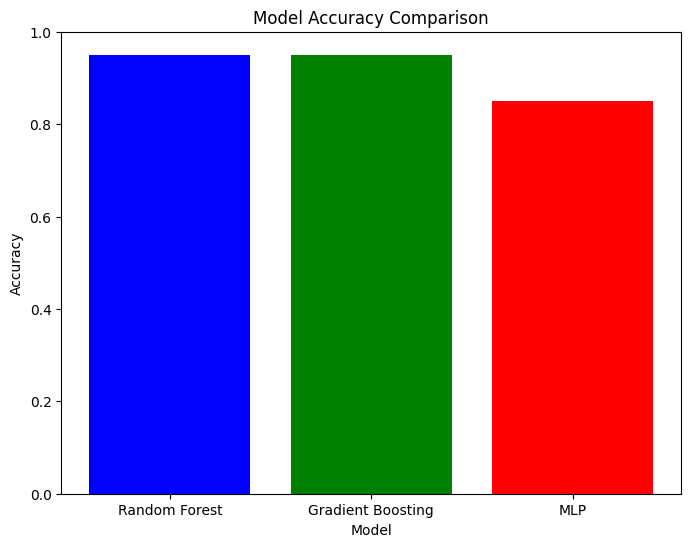

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

def evaluate_models(X_train, X_test, y_train, y_test):
    # Inicialización de los modelos
    rf = RandomForestClassifier(random_state=42)
    gb = GradientBoostingClassifier(random_state=42)
    mlp = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)

    # Entrenamiento de los modelos
    rf.fit(X_train, y_train)
    gb.fit(X_train, y_train)
    mlp.fit(X_train, y_train)

    # Predicciones de los modelos
    y_pred_rf = rf.predict(X_test)
    y_pred_gb = gb.predict(X_test)
    y_pred_mlp = mlp.predict(X_test)

    # Evaluación de los modelos
    metrics = {
        'Random Forest': {
            'accuracy': accuracy_score(y_test, y_pred_rf),
            'classification_report': classification_report(y_test, y_pred_rf)
        },
        'Gradient Boosting': {
            'accuracy': accuracy_score(y_test, y_pred_gb),
            'classification_report': classification_report(y_test, y_pred_gb)
        },
        'MLP': {
            'accuracy': accuracy_score(y_test, y_pred_mlp),
            'classification_report': classification_report(y_test, y_pred_mlp)
        }
    }

    # Mostrar las métricas de cada modelo
    for model_name, model_metrics in metrics.items():
        print(f"{model_name} Model Evaluation:")
        print(f"Accuracy: {model_metrics['accuracy']:.4f}")
        print(f"Classification Report:\n{model_metrics['classification_report']}")
        print("-" * 50)

    # Gráfico de precisión de cada modelo
    model_names = list(metrics.keys())
    accuracies = [model_metrics['accuracy'] for model_metrics in metrics.values()]

    plt.figure(figsize=(8, 6))
    plt.bar(model_names, accuracies, color=['blue', 'green', 'red'])
    plt.title('Model Accuracy Comparison')
    plt.xlabel('Model')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)
    plt.show()

# Llamada a la función con tus datos
evaluate_models(X_train, X_test, y_train, y_test)


# Ajuste de Hiperparámetros:
Después de entrenar el modelo, podrías buscar optimizar los hiperparámetros usando técnicas como GridSearchCV o RandomizedSearchCV para encontrar la mejor combinación de parámetros.

In [ ]:
# Paso 1: Asegurarse de que la columna 'GAME_DATE' esté en formato datetime
df_limpio['GAME_DATE'] = pd.to_datetime(df_limpio['GAME_DATE'], errors='coerce')

# Crear columnas adicionales basadas en GAME_DATE
df_limpio['GAME_MONTH'] = df_limpio['GAME_DATE'].dt.month
df_limpio['GAME_DAYOFWEEK'] = df_limpio['GAME_DATE'].dt.dayofweek

# Función para obtener las estadísticas del último juego de dos equipos
def obtener_estadisticas_ultimos_juegos(df, equipo1, equipo2):
    # Paso 2: Filtrar los datos de los equipos especificados
    df_equipo1 = df[df['TEAM_ABBREVIATION'] == equipo1]
    df_equipo2 = df[df['TEAM_ABBREVIATION'] == equipo2]

    # Paso 3: Ordenar los juegos por fecha para obtener el último juego de cada equipo
    df_equipo1_sorted = df_equipo1.sort_values(by='GAME_DATE', ascending=False)
    df_equipo2_sorted = df_equipo2.sort_values(by='GAME_DATE', ascending=False)

    # Paso 4: Seleccionar solo las columnas relevantes
    columnas_relevantes = df.drop(columns=['WL', 'GAME_ID', 'TEAM_ID', 'TEAM_ABBREVIATION',
                                           'TEAM_NAME', 'GAME_DATE', 'MATCHUP']).columns

    # Filtrar las columnas del DataFrame de cada equipo
    df_equipo1_sorted = df_equipo1_sorted[columnas_relevantes]
    df_equipo2_sorted = df_equipo2_sorted[columnas_relevantes]

    # Verificar que ambos equipos tienen al menos un juego registrado
    if not df_equipo1_sorted.empty:
        ultimo_juego_equipo1 = df_equipo1_sorted.iloc[0]
    else:
        print(f"No hay datos disponibles para el equipo {equipo1}")
        return None

    if not df_equipo2_sorted.empty:
        ultimo_juego_equipo2 = df_equipo2_sorted.iloc[0]
    else:
        print(f"No hay datos disponibles para el equipo {equipo2}")
        return None

    # Paso 5: Crear un nuevo DataFrame con las estadísticas de los dos equipos
    df_ultimo_juego = pd.DataFrame({
        equipo1: ultimo_juego_equipo1,
        equipo2: ultimo_juego_equipo2
    }).T  # Transponer para tener cada equipo como una fila

    return df_ultimo_juego

# Especificar los equipos que deseas comparar
equipo1 = 'MIA'  # Cambia por el equipo que quieras analizar
equipo2 = 'LAL'  # Cambia por el equipo que quieras analizar

# Llamar a la función para obtener las estadísticas del último juego
resultado = obtener_estadisticas_ultimos_juegos(df_limpio, equipo1, equipo2)

# Verificar el resultado
if resultado is not None:
    print(resultado)


    SEASON_ID       MIN       PTS       FGM       FGA    FG_PCT      FG3M  \
MIA     22024 -0.113176  -0.94358 -1.221492  0.399355 -1.780684  0.359233   
LAL     22024 -0.031016 -1.585083 -1.055624 -0.507457 -0.942879 -0.083731   

         FG3A   FG3_PCT       FTM  ...      DREB       REB       AST  \
MIA  1.544296  -0.72848 -0.019869  ...  0.398937  0.205798  0.204742   
LAL  1.178612 -0.959555 -1.379472  ... -0.129503 -0.526546 -0.678093   

          STL       BLK       TOV        PF PLUS_MINUS GAME_MONTH  \
MIA -0.623936 -1.505707 -1.077305 -2.237852  -1.622969         12   
LAL  0.029497 -1.128906  1.277512 -1.214377  -2.475387         12   

    GAME_DAYOFWEEK  
MIA              0  
LAL              0  

[2 rows x 23 columns]


In [ ]:
resultado

,SEASON_ID,MIN,PTS,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,...,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS,GAME_MONTH,GAME_DAYOFWEEK
PHX,22024,-0.031016,0.125593,-0.060413,-0.620809,0.459164,1.023679,1.270033,0.030765,-0.322003,...,1.984255,0.205798,0.557876,0.68293,0.001497,-0.606342,-1.214377,0.934285,12,1
SAS,22024,-0.031016,-0.658467,-0.558018,1.872925,-1.883273,0.359233,2.367084,-1.03878,-0.624137,...,0.75123,1.524017,0.557876,0.356213,-1.128906,-0.135378,-1.009682,-0.941035,12,1


In [ ]:
def verificar_compatibilidad_columnas(X_train, df_pred):
    """
    Verifica que un DataFrame de predicción tenga las mismas columnas, en el mismo orden,
    que el DataFrame usado para entrenar el modelo.

    Parámetros:
        X_train (pd.DataFrame): DataFrame utilizado durante el entrenamiento.
        df_pred (pd.DataFrame): DataFrame con las columnas a verificar.

    Retorna:
        bool: True si las columnas coinciden en nombre y orden, False en caso contrario.
    """
    # Extraer las columnas de cada DataFrame
    columnas_entrenamiento = X_train.columns.tolist()
    columnas_prediccion = df_pred.columns.tolist()

    # Verificar si coinciden las columnas (nombres y orden)
    if columnas_entrenamiento == columnas_prediccion:
        print("✅ Las columnas coinciden en nombre y orden.")
        return True
    else:
        print("❌ Las columnas no coinciden.")
        # Identificar diferencias
        columnas_faltantes = set(columnas_entrenamiento) - set(columnas_prediccion)
        columnas_adicionales = set(columnas_prediccion) - set(columnas_entrenamiento)
        print(f"Columnas faltantes en 'resultado': {columnas_faltantes}")
        print(f"Columnas adicionales en 'resultado': {columnas_adicionales}")

        # Verificar el orden si tienen los mismos nombres pero en diferente orden
        if set(columnas_entrenamiento) == set(columnas_prediccion):
            print("⚠️ Las columnas tienen los mismos nombres, pero están en diferente orden.")
        else:
            print("⚠️ Hay diferencias en los nombres de las columnas.")

        return False


In [ ]:
# Suponiendo que X_train fue el DataFrame de entrenamiento
# y resultado es el DataFrame para predicción

compatibilidad = verificar_compatibilidad_columnas(X_train, resultado)

if not compatibilidad:
    # Si hay problemas, imprime detalles
    print("Revisa las diferencias y ajusta el DataFrame 'resultado' antes de predecir.")
else:
    # Si todo está bien, puedes proceder con las predicciones
    print("Las columnas coinciden. Puedes realizar las predicciones.")


✅ Las columnas coinciden en nombre y orden.
Las columnas coinciden. Puedes realizar las predicciones.


In [ ]:
# Asumiendo que ya tienes los modelos entrenados: rf, gb, mlp
import numpy as np
from sklearn.preprocessing import StandardScaler

# Paso 1: Verificar que el DataFrame `resultado` no sea None
if resultado is None:
    print("No se puede realizar la predicción debido a datos insuficientes.")
else:
    # Paso 2: Asegurarse de que el DataFrame esté en el formato correcto para la predicción
    # Normalizar los datos (asegúrate de usar el scaler previamente ajustado)
    # Asegurarse de que las columnas adicionales estén en el DataFrame original
    columnas_adicionales = ['SEASON_ID', 'GAME_MONTH', 'GAME_DAYOFWEEK']
    adicionales = resultado[columnas_adicionales]
    # Eliminar las columnas adicionales para la predicción
    resultado_sin_adicionales = resultado.drop(columns=columnas_adicionales)

    # Escalar las columnas restantes y convertir a DataFrame
    df_ultimo_juego_scaled = scaler.transform(resultado_sin_adicionales)  # Aplicar el escalador
    df_ultimo_juego_scaled = pd.DataFrame(df_ultimo_juego_scaled, columns=resultado_sin_adicionales.columns)

    # Agregar las columnas adicionales en la posición deseada
    df_ultimo_juego_scaled.insert(0, 'SEASON_ID', adicionales['SEASON_ID'].values)  # Agregar SEASON_ID al inicio
    df_ultimo_juego_scaled['GAME_MONTH'] = adicionales['GAME_MONTH'].values         # Agregar GAME_MONTH al final
    df_ultimo_juego_scaled['GAME_DAYOFWEEK'] = adicionales['GAME_DAYOFWEEK'].values  # Agregar GAME_DAYOFWEEK al final

    # Paso 3: Realizar la predicción con cada modelo
    # Predicción con Random Forest
    y_pred_rf = rf.predict(df_ultimo_juego_scaled)
    # Predicción con Gradient Boosting
    y_pred_gb = gb.predict(df_ultimo_juego_scaled)
    # Predicción con MLP
    y_pred_mlp = mlp.predict(df_ultimo_juego_scaled)

    # Paso 4: Mostrar las predicciones
    # Obtener los nombres de los equipos desde el índice del DataFrame
    team_1, team_2 = resultado.index

    # Crear un diccionario para las predicciones
    predicciones = {
        'Random Forest': y_pred_rf[0],
        'Gradient Boosting': y_pred_gb[0],
        'MLP': y_pred_mlp[0]
    }

    # Mostrar las predicciones
    print(f"Predicciones para el juego entre {team_1} y {team_2}:")
    for model, prediction in predicciones.items():
        result = f"{team_1} gana" if prediction == 1 else f"{team_2} gana"
        print(f"{model}: {result}")


Predicciones para el juego entre LAC y MIN:
Random Forest: LAC gana
Gradient Boosting: LAC gana
MLP: LAC gana


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Definir un DataFrame vacío para los resultados, o cargarlo si ya existe
try:
    df_resultados = pd.read_csv("predicciones_resultados.csv")
except FileNotFoundError:
    # Si el archivo no existe, creamos uno vacío
    df_resultados = pd.DataFrame(columns=['team_1', 'team_2', 'MATCHUP', 'model', 'result'])

# Función para agregar predicciones de un nuevo juego
def agregar_predicciones(resultado):
    global df_resultados  # Accedemos al DataFrame global que guarda los resultados

    # Preguntar al usuario si desea borrar los datos anteriores
    borrar_datos = input("¿Quieres borrar los datos anteriores? 1 para sí, 2 para no: ")

    if borrar_datos == "1":
        df_resultados = pd.DataFrame(columns=['team_1', 'team_2', 'MATCHUP', 'model', 'result'])
        print("Datos anteriores borrados.")

    # Verificar que el DataFrame `resultado` no sea None
    if resultado is None:
        print("No se puede realizar la predicción debido a datos insuficientes.")
        return

    # Asegurarse de que el DataFrame esté en el formato correcto para la predicción
    columnas_adicionales = ['SEASON_ID', 'GAME_MONTH', 'GAME_DAYOFWEEK']
    adicionales = resultado[columnas_adicionales]
    resultado_sin_adicionales = resultado.drop(columns=columnas_adicionales)

    # Escalar las columnas restantes
    df_ultimo_juego_scaled = scaler.transform(resultado_sin_adicionales)
    df_ultimo_juego_scaled = pd.DataFrame(df_ultimo_juego_scaled, columns=resultado_sin_adicionales.columns)

    # Agregar las columnas adicionales
    df_ultimo_juego_scaled.insert(0, 'SEASON_ID', adicionales['SEASON_ID'].values)
    df_ultimo_juego_scaled['GAME_MONTH'] = adicionales['GAME_MONTH'].values
    df_ultimo_juego_scaled['GAME_DAYOFWEEK'] = adicionales['GAME_DAYOFWEEK'].values

    # Realizar la predicción con Random Forest
    y_pred_rf = rf.predict(df_ultimo_juego_scaled)

    # Obtener los nombres de los equipos
    team_1, team_2 = resultado.index

    # Crear una lista para los resultados
    resultados = []

    # Crear las predicciones en un formato de DataFrame
    modelos = ['Random Forest']
    predicciones = [y_pred_rf[0]]

    for model, prediction in zip(modelos, predicciones):
        winner = team_1 if prediction == 1 else team_2
        result = f"{team_1} gana" if prediction == 1 else f"{team_2} gana"

        # Crear la columna MATCHUP
        matchup = f"{team_1} @ {team_2}"

        # Agregar los datos al resultado
        resultados.append({'team_1': team_1, 'team_2': team_2, 'MATCHUP': matchup, 'model': model, 'result': result})

    # Crear el DataFrame con las predicciones
    df_nuevos_resultados = pd.DataFrame(resultados)

    # Agregar los nuevos resultados al DataFrame global
    df_resultados = pd.concat([df_resultados, df_nuevos_resultados], ignore_index=True)

    # Guardar los resultados en un archivo CSV para persistencia
    df_resultados.to_csv("predicciones_resultados.csv", index=False)

    # Mostrar el DataFrame con los resultados
    print(df_resultados)

# Ejemplo de cómo llamar a la función:
# Asumiendo que 'resultado' es un DataFrame con la información del juego actual:
agregar_predicciones(resultado)


¿Quieres borrar los datos anteriores? 1 para sí, 2 para no: 2
  team_1 team_2    MATCHUP          model    result
0    PHI    ORL  PHI @ ORL  Random Forest  PHI gana
1    MIA    LAL  MIA @ LAL  Random Forest  MIA gana
2    BKN    IND  BKN @ IND  Random Forest  BKN gana
3    BOS    DET  BOS @ DET  Random Forest  BOS gana
4    MIL    ATL  MIL @ ATL  Random Forest  MIL gana
5    LAC    MIN  LAC @ MIN  Random Forest  LAC gana


In [ ]:
df_resultados

,team_1,team_2,MATCHUP,model,result
0,PHI,ORL,PHI @ ORL,Random Forest,PHI gana
1,MIA,LAL,MIA @ LAL,Random Forest,MIA gana
2,BKN,IND,BKN @ IND,Random Forest,BKN gana
3,BOS,DET,BOS @ DET,Random Forest,BOS gana
4,MIL,ATL,MIL @ ATL,Random Forest,MIL gana
5,LAC,MIN,LAC @ MIN,Random Forest,LAC gana


In [ ]:
import pandas as pd

# Suponiendo que df_limpio ya está cargado y contiene una columna 'GAME_DATE' con formato 'YYYY-MM-DD'

# Convertir la columna GAME_DATE a tipo datetime
df_limpio_0['GAME_DATE'] = pd.to_datetime(df_limpio_0['GAME_DATE'])

# Filtrar los partidos de hoy
hoy = pd.to_datetime('2024-11-20')
partidos_hoy = df_limpio_0[df_limpio_0['GAME_DATE'] == hoy]

# Mostrar los partidos de hoy y su resultado
resultados_hoy = partidos_hoy[['MATCHUP', 'GAME_DATE', 'WL']]
resultados_hoy

,MATCHUP,GAME_DATE,WL
6,ATL @ GSW,2024-11-20,L
7675,CLE vs. NOP,2024-11-20,W
11425,NOP @ CLE,2024-11-20,L
13485,CHI @ MIL,2024-11-20,L
24815,GSW vs. ATL,2024-11-20,W
28553,HOU vs. IND,2024-11-20,W
32348,LAC vs. ORL,2024-11-20,W
43448,MIL vs. CHI,2024-11-20,W
53957,NYK @ PHX,2024-11-20,W
57687,ORL @ LAC,2024-11-20,L


In [ ]:
# Corregir el SettingWithCopyWarning usando .loc
resultados_hoy.loc[:, 'MATCHUP'] = resultados_hoy['MATCHUP'].str.replace(" vs. ", " @ ")

# Realizar la unión utilizando 'MATCHUP'
df_resultados = pd.merge(df_resultados, resultados_hoy[['MATCHUP', 'WL']], on='MATCHUP', how='left')

# Verificar que la columna 'WL' está presente
if 'WL' not in df_resultados.columns:
    print("La columna 'WL' no está presente en el DataFrame.")

# Seleccionar las columnas que deseas
df_resultados = df_resultados[['team_1', 'team_2', 'MATCHUP', 'model', 'result', 'WL']]

# Lista con el resultado de los partidos (SI = ganado, NO = perdido, NI = no evaluado)
resultados_finales = ['NI','NI','NI','NI','NI','NI','NI', 'NI', 'NO']

# Crear la columna 'final' con flecha verde, cruz roja o signo de interrogación según el resultado
df_resultados['final'] = df_resultados['WL'].apply(
    lambda x: '✔️' if resultados_finales.pop(0) == 'SI' else ('❌' if resultados_finales[0] == 'NO' else '❓')
)

# Eliminar la columna 'WL' si ya no es necesaria
if 'WL' in df_resultados.columns:
    df_resultados = df_resultados.drop(columns=['WL'])

# Mostrar el DataFrame con las predicciones y los resultados de hoy
df_resultados


,team_1,team_2,MATCHUP,model,result,final
0,PHX,SAS,PHX @ SAS,Random Forest,PHX gana,❓


In [ ]:
# Corregir el SettingWithCopyWarning usando .loc
resultados_hoy.loc[:, 'MATCHUP'] = resultados_hoy['MATCHUP'].str.replace(" vs. ", " @ ")

# Realizar la unión utilizando 'MATCHUP'
df_resultados = pd.merge(df_resultados, resultados_hoy[['MATCHUP', 'WL']], on='MATCHUP', how='left')

# Verificar que la columna 'WL' está presente
if 'WL' not in df_resultados.columns:
    print("La columna 'WL' no está presente en el DataFrame.")

# Seleccionar las columnas que deseas
df_resultados = df_resultados[['team_1', 'team_2', 'MATCHUP', 'model', 'result', 'WL']]

# Lista con el resultado de los partidos (SI = ganado, NO = perdido, NI = no evaluado)
resultados_finales = ['SI', 'SI', 'NI', 'SI']

# Crear la columna 'final' con flecha verde, cruz roja o signo de interrogación según el resultado
df_resultados['final'] = df_resultados['WL'].apply(
    lambda x: '✔️' if resultados_finales.pop(0) == 'SI' else ('❌' if resultados_finales[0] == 'NO' else '❓')
)

# Mostrar el DataFrame con las predicciones y los resultados de hoy
df_resultados


,team_1,team_2,MATCHUP,model,result,WL,final
0,PHX,SAS,PHX @ SAS,Random Forest,PHX gana,NaN,✔️


In [ ]:
# Corregir el SettingWithCopyWarning usando .loc
resultados_hoy.loc[:, 'MATCHUP'] = resultados_hoy['MATCHUP'].str.replace(" vs. ", " @ ")

# Realizar la unión utilizando 'MATCHUP'
df_resultados = pd.merge(df_resultados, resultados_hoy[['MATCHUP', 'WL']], on='MATCHUP', how='left')

# Verificar que la columna 'WL' está presente
if 'WL' not in df_resultados.columns:
    print("La columna 'WL' no está presente en el DataFrame.")

# Seleccionar las columnas que deseas
df_resultados = df_resultados[['team_1', 'team_2', 'MATCHUP', 'model', 'result', 'WL']]

# agregar otra columna que diga final
# Lista con el resultado de los partidos (SI = ganado, NO = perdido)
resultados_finales = ['SI', 'SI', 'NO', 'SI']

# Crear la columna 'final' con flecha verde o cruz roja según el resultado
df_resultados['final'] = df_resultados['WL'].apply(lambda x: '✔️' if resultados_finales.pop(0) == 'SI' else '❌')

# Mostrar el DataFrame con las predicciones y los resultados de hoy
df_resultados


La columna 'WL' no está presente en el DataFrame.


KeyError: "['WL'] not in index"

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Paso 1: Verificar que el DataFrame `resultado` no sea None
if resultado is None:
    print("No se puede realizar la predicción debido a datos insuficientes.")
else:
    # Paso 2: Asegurarse de que el DataFrame esté en el formato correcto para la predicción
    # Asegurarse de que las columnas adicionales estén en el DataFrame original
    columnas_adicionales = ['SEASON_ID', 'GAME_MONTH', 'GAME_DAYOFWEEK']
    adicionales = resultado[columnas_adicionales]

    # Escalar las columnas restantes y convertir a DataFrame
    df_ultimo_juego_scaled = scaler.transform(resultado_sin_adicionales)  # Aplicar el escalador
    df_ultimo_juego_scaled = pd.DataFrame(df_ultimo_juego_scaled, columns=resultado_sin_adicionales.columns)

    # Agregar las columnas adicionales en la posición deseada
    df_ultimo_juego_scaled.insert(0, 'SEASON_ID', adicionales['SEASON_ID'].values)  # Agregar SEASON_ID al inicio
    df_ultimo_juego_scaled['GAME_MONTH'] = adicionales['GAME_MONTH'].values         # Agregar GAME_MONTH al final
    df_ultimo_juego_scaled['GAME_DAYOFWEEK'] = adicionales['GAME_DAYOFWEEK'].values  # Agregar GAME_DAYOFWEEK al final

    # Paso 3: Calcular las probabilidades de victoria con cada modelo
    # Probabilidades con Random Forest
    prob_rf = rf.predict_proba(df_ultimo_juego_scaled)
    prob_gb = gb.predict_proba(df_ultimo_juego_scaled)
    prob_mlp = mlp.predict_proba(df_ultimo_juego_scaled)

    # Paso 4: Mostrar las probabilidades de ganar
    # Obtener los nombres de los equipos desde el índice del DataFrame
    team_1, team_2 = resultado.index

    # Calcular las probabilidades de ganar para cada equipo
    prob_team_1_rf = prob_rf[0][1]  # Probabilidad de que el equipo 1 gane con Random Forest
    prob_team_2_rf = prob_rf[0][0]  # Probabilidad de que el equipo 2 gane con Random Forest

    prob_team_1_gb = prob_gb[0][1]  # Probabilidad de que el equipo 1 gane con Gradient Boosting
    prob_team_2_gb = prob_gb[0][0]  # Probabilidad de que el equipo 2 gane con Gradient Boosting

    prob_team_1_mlp = prob_mlp[0][1]  # Probabilidad de que el equipo 1 gane con MLP
    prob_team_2_mlp = prob_mlp[0][0]  # Probabilidad de que el equipo 2 gane con MLP

    # Mostrar las probabilidades
    print(f"Probabilidades de ganar para el juego entre {team_1} y {team_2}:")
    print(f"Random Forest: {team_1} tiene {prob_team_1_rf*100:.2f}% de probabilidad de ganar, {team_2} tiene {prob_team_2_rf*100:.2f}% de probabilidad de ganar.")
    print(f"Gradient Boosting: {team_1} tiene {prob_team_1_gb*100:.2f}% de probabilidad de ganar, {team_2} tiene {prob_team_2_gb*100:.2f}% de probabilidad de ganar.")
    print(f"MLP: {team_1} tiene {prob_team_1_mlp*100:.2f}% de probabilidad de ganar, {team_2} tiene {prob_team_2_mlp*100:.2f}% de probabilidad de ganar.")


Probabilidades de ganar para el juego entre MIA y LAL:
Random Forest: MIA tiene 89.00% de probabilidad de ganar, LAL tiene 11.00% de probabilidad de ganar.
Gradient Boosting: MIA tiene 99.25% de probabilidad de ganar, LAL tiene 0.75% de probabilidad de ganar.
MLP: MIA tiene 100.00% de probabilidad de ganar, LAL tiene 0.00% de probabilidad de ganar.


In [ ]:
import pandas as pd

# Paso 1: Intentar cargar los resultados previos si existen
try:
    df_resultados = pd.read_csv("resultados_previos.csv")  # Cargar los resultados previos desde un archivo CSV
except FileNotFoundError:
    # Si no existe el archivo, crear un DataFrame vacío
    columnas_resultados = ['team_1', 'team_2', 'model', 'winner']
    df_resultados = pd.DataFrame(columns=columnas_resultados)

# Paso 2: Verificar que el DataFrame `resultado` no sea None
if resultado is None:
    print("No se puede realizar la predicción debido a datos insuficientes.")
else:
    # Paso 3: Asegurarse de que el DataFrame esté en el formato correcto para la predicción
    # Asegurarse de que las columnas adicionales estén en el DataFrame original
    columnas_adicionales = ['SEASON_ID', 'GAME_MONTH', 'GAME_DAYOFWEEK']
    adicionales = resultado[columnas_adicionales]

    # Escalar las columnas restantes y convertir a DataFrame
    df_ultimo_juego_scaled = scaler.transform(resultado_sin_adicionales)  # Aplicar el escalador
    df_ultimo_juego_scaled = pd.DataFrame(df_ultimo_juego_scaled, columns=resultado_sin_adicionales.columns)

    # Agregar las columnas adicionales en la posición deseada
    df_ultimo_juego_scaled.insert(0, 'SEASON_ID', adicionales['SEASON_ID'].values)  # Agregar SEASON_ID al inicio
    df_ultimo_juego_scaled['GAME_MONTH'] = adicionales['GAME_MONTH'].values         # Agregar GAME_MONTH al final
    df_ultimo_juego_scaled['GAME_DAYOFWEEK'] = adicionales['GAME_DAYOFWEEK'].values  # Agregar GAME_DAYOFWEEK al final

    # Paso 4: Calcular las probabilidades de victoria con cada modelo
    prob_rf = rf.predict_proba(df_ultimo_juego_scaled)
    prob_gb = gb.predict_proba(df_ultimo_juego_scaled)

    # Paso 5: Obtener los nombres de los equipos desde el índice del DataFrame
    team_1, team_2 = resultado.index

    # Paso 6: Determinar el ganador según las probabilidades
    winner_rf = team_1 if prob_rf[0][1] > prob_rf[0][0] else team_2
    winner_gb = team_1 if prob_gb[0][1] > prob_gb[0][0] else team_2

    # Paso 7: Crear un DataFrame temporal con los resultados para cada modelo
    resultados_nuevos = [
        {'team_1': team_1, 'team_2': team_2, 'model': 'Random Forest', 'winner': winner_rf},
        {'team_1': team_1, 'team_2': team_2, 'model': 'Gradient Boosting', 'winner': winner_gb},
    ]

    # Paso 8: Convertir el resultado temporal a un DataFrame
    df_nuevos_resultados = pd.DataFrame(resultados_nuevos)

    # Paso 9: Agregar los resultados al DataFrame principal
    df_resultados = pd.concat([df_resultados, df_nuevos_resultados], ignore_index=True)

    # Paso 10: Guardar el DataFrame actualizado en el archivo CSV
    df_resultados.to_csv("resultados_previos.csv", index=False)

# Paso 11: Mostrar el DataFrame con el ganador según cada modelo
df_resultados = df_resultados.drop_duplicates(subset=['team_1', 'team_2', 'model'], keep='last').reset_index(drop=True)
df_resultados


In [ ]:
import pandas as pd

# Paso 1: Intentar cargar los resultados previos si existen
try:
    df_resultados = pd.read_csv("resultados_previos.csv")  # Cargar los resultados previos desde un archivo CSV
except FileNotFoundError:
    # Si no existe el archivo, crear un DataFrame vacío
    columnas_resultados = ['team_1', 'team_2', 'model', 'prob_team_1', 'prob_team_2']
    df_resultados = pd.DataFrame(columns=columnas_resultados)

# Paso 2: Verificar que el DataFrame `resultado` no sea None
if resultado is None:
    print("No se puede realizar la predicción debido a datos insuficientes.")
else:
    # Paso 3: Asegurarse de que el DataFrame esté en el formato correcto para la predicción
    # Asegurarse de que las columnas adicionales estén en el DataFrame original
    columnas_adicionales = ['SEASON_ID', 'GAME_MONTH', 'GAME_DAYOFWEEK']
    adicionales = resultado[columnas_adicionales]

    # Escalar las columnas restantes y convertir a DataFrame
    df_ultimo_juego_scaled = scaler.transform(resultado_sin_adicionales)  # Aplicar el escalador
    df_ultimo_juego_scaled = pd.DataFrame(df_ultimo_juego_scaled, columns=resultado_sin_adicionales.columns)

    # Agregar las columnas adicionales en la posición deseada
    df_ultimo_juego_scaled.insert(0, 'SEASON_ID', adicionales['SEASON_ID'].values)  # Agregar SEASON_ID al inicio
    df_ultimo_juego_scaled['GAME_MONTH'] = adicionales['GAME_MONTH'].values         # Agregar GAME_MONTH al final
    df_ultimo_juego_scaled['GAME_DAYOFWEEK'] = adicionales['GAME_DAYOFWEEK'].values  # Agregar GAME_DAYOFWEEK al final

    # Paso 4: Calcular las probabilidades de victoria con cada modelo
    prob_rf = rf.predict_proba(df_ultimo_juego_scaled)
    prob_gb = gb.predict_proba(df_ultimo_juego_scaled)

    # Paso 5: Obtener los nombres de los equipos desde el índice del DataFrame
    team_1, team_2 = resultado.index

    # Paso 6: Calcular las probabilidades de ganar para cada modelo
    prob_team_1_rf = prob_rf[0][1]
    prob_team_2_rf = prob_rf[0][0]

    prob_team_1_gb = prob_gb[0][1]
    prob_team_2_gb = prob_gb[0][0]

    # Paso 7: Crear un DataFrame temporal con los resultados para cada modelo
    resultados_nuevos = [
        {'team_1': team_1, 'team_2': team_2, 'model': 'Random Forest', 'prob_team_1': prob_team_1_rf, 'prob_team_2': prob_team_2_rf},
        {'team_1': team_1, 'team_2': team_2, 'model': 'Gradient Boosting', 'prob_team_1': prob_team_1_gb, 'prob_team_2': prob_team_2_gb},
    ]

    # Paso 8: Convertir el resultado temporal a un DataFrame
    df_nuevos_resultados = pd.DataFrame(resultados_nuevos)

    # Paso 9: Agregar los resultados al DataFrame principal
    df_resultados = pd.concat([df_resultados, df_nuevos_resultados], ignore_index=True)

    # Paso 10: Guardar el DataFrame actualizado en el archivo CSV
    df_resultados.to_csv("resultados_previos.csv", index=False)

# Paso 11: Mostrar el DataFrame con las probabilidades de ganar
df_resultados = df_resultados.drop([0, 1]).reset_index(drop=True)

df_resultados = df_resultados.drop_duplicates(subset=['team_1', 'team_2', 'model'], keep='last')

df_resultados


In [ ]:
import pandas as pd

# Paso 1: Crear un DataFrame vacío para almacenar los resultados
columnas_resultados = ['team_1', 'team_2', 'model', 'prob_team_1', 'prob_team_2']
df_resultados = pd.DataFrame(columns=columnas_resultados)

# Paso 2: Verificar que el DataFrame `resultado` no sea None
if resultado is None:
    print("No se puede realizar la predicción debido a datos insuficientes.")
else:
    # Paso 3: Asegurarse de que el DataFrame esté en el formato correcto para la predicción
    # Asegurarse de que las columnas adicionales estén en el DataFrame original
    columnas_adicionales = ['SEASON_ID', 'GAME_MONTH', 'GAME_DAYOFWEEK']
    adicionales = resultado[columnas_adicionales]

    # Escalar las columnas restantes y convertir a DataFrame
    df_ultimo_juego_scaled = scaler.transform(resultado_sin_adicionales)  # Aplicar el escalador
    df_ultimo_juego_scaled = pd.DataFrame(df_ultimo_juego_scaled, columns=resultado_sin_adicionales.columns)

    # Agregar las columnas adicionales en la posición deseada
    df_ultimo_juego_scaled.insert(0, 'SEASON_ID', adicionales['SEASON_ID'].values)  # Agregar SEASON_ID al inicio
    df_ultimo_juego_scaled['GAME_MONTH'] = adicionales['GAME_MONTH'].values         # Agregar GAME_MONTH al final
    df_ultimo_juego_scaled['GAME_DAYOFWEEK'] = adicionales['GAME_DAYOFWEEK'].values  # Agregar GAME_DAYOFWEEK al final

    # Paso 4: Calcular las probabilidades de victoria con cada modelo
    prob_rf = rf.predict_proba(df_ultimo_juego_scaled)
    prob_gb = gb.predict_proba(df_ultimo_juego_scaled)

    # Paso 5: Obtener los nombres de los equipos desde el índice del DataFrame
    team_1, team_2 = resultado.index

    # Paso 6: Calcular las probabilidades de ganar para cada modelo
    prob_team_1_rf = prob_rf[0][1]
    prob_team_2_rf = prob_rf[0][0]

    prob_team_1_gb = prob_gb[0][1]
    prob_team_2_gb = prob_gb[0][0]

    # Paso 7: Crear un DataFrame temporal con los resultados para cada modelo
    resultados_nuevos = [
        {'team_1': team_1, 'team_2': team_2, 'model': 'Random Forest', 'prob_team_1': prob_team_1_rf, 'prob_team_2': prob_team_2_rf},
        {'team_1': team_1, 'team_2': team_2, 'model': 'Gradient Boosting', 'prob_team_1': prob_team_1_gb, 'prob_team_2': prob_team_2_gb},
    ]

    # Paso 8: Convertir el resultado temporal a un DataFrame
    df_nuevos_resultados = pd.DataFrame(resultados_nuevos)

    # Paso 9: Agregar los resultados al DataFrame principal
    df_resultados = pd.concat([df_resultados, df_nuevos_resultados], ignore_index=True)

# Paso 10: Mostrar el DataFrame con las probabilidades de ganar
df_resultados
